# Transforming and Combining Data

In the previous module you worked on a dataset that combined two different `World Health
Organization datasets: population and the number of deaths due to tuberculosis`.
They could be combined because they share a `common attribute: the countries`. This
week you will learn the techniques behind the creation of such a combined dataset.

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [2]:
def roundToMillions (value):
    return round(value / 1000000)

In [3]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

In [4]:
def expandCountry (name):
    if name == 'UK':
        return 'United Kingdom'
    elif name == 'USA':
        return 'United States'
    else:
        return name

## Getting real

Having tried out the data transformations and combination on small tables, I think we feel confident enough
about using the full data from the World Bank, which I pointed you to in Life expectancy
project.
Open a new browser window and go to the World Bank’s data page. Type ‘GDP’ (without
the quote marks) in the ‘Find an indicator’ box in the centre of the page and select ‘GDP
current US$’. Click ‘Go’. This will take you to the data page you looked at earlier. Look at
the top of your browser window. You will notice the URL is
http://data.worldbank.org/indicator/NY.GDP.MKTP.CD. Every World Bank dataset is for an
indicator (in this case GDP in current dollars) with a unique name (in this case NY.GDP.
MKTP.CD).
Knowing the indicator name, it’s a doddle to get the data directly into a dataframe, by
using the download() function of the wb (World Bank) module, instead of first
downloading a CSV or Excel file and then loading it into a dataframe. 
Here’s the code to get the 2013 GDP values for all countries. It may take a little while for
the code to fetch the data.

It is possible to directly download data from the World Bank, for a particular time period and indicator, like the GDP in current US dollars. The indicator name is given in the URL of the webpage about the dataset.

Getting the data directly from the World Bank only works Anaconda and requires an Internet connection. It can take some time to download the data, depending on the speed of your connection and the load on the World Bank server. Moreover, the World Bank occasionally changes the layout of the data, which could break the code in the rest of this notebook. 

To avoid such problems I have saved the World Bank data into CSV files. The data is in a column with the same name as the indicator. Hence I declare the indicator names as constants, to be used later when processing the dataframe.

In [5]:
gdpReset = pd.read_csv('WB GDP 2013.csv')

lifeReset = pd.read_csv('WB LE 2013.csv')

The CSV files were obtained in two steps, which are shown next in commented code because we already have the CSV files. 

First the data was obtained directly from the World Bank using a particular function in pandas, and indicating the desired indicator and time period. Note that you may have to install the `pandas_datareader` module, using Anaconda Navigator.

In [6]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
LIFE_INDICATOR = 'SP.DYN.LE00.IN'

In [8]:
!pip install pandas_datareader

In [9]:
if pd.__version__.startswith('0.23'):
    # this solves an incompatibility between pandas 0.23 and datareader 0.6
    # taken from https://stackoverflow.com/questions/50394873/
    core.common.is_list_like = api.types.is_list_like

from pandas_datareader.wb import download

YEAR = 2013
gdpWB = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
lifeWB = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
lifeWB.head()

,,SP.DYN.LE00.IN
country,year,
Arab World,2013,70.882254
Caribbean small states,2013,73.030144
Central Europe and the Baltics,2013,76.355163
Early-demographic dividend,2013,69.145177
East Asia & Pacific,2013,74.848215


The downloaded dataframe has descriptive row names instead of the usual 0, 1, 2, etc. In other words, the dataframe's index is given by the country and year instead of integers. Hence the second step was to reset the index. 

In [ ]:
# gdpReset = gdpWB.reset_index()
# lifeReset = lifeWB.reset_index()

Resetting the index put the dataframes into the usual form, which was saved to CSV files. 

In [10]:
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


### Tasks

1. Create a data frame with the World Bank's data on population, using the CSV file provided. **This dataframe will be used in the remaining task.**
- If you're using Anaconda, uncomment the code above and run it to check that you can get the GDP and life expectancy data directly from the World Bank if you dont want to use the data provided. **Don't forget to afterwards comment again the code.**
- If you have extra time, you can alternatively obtain the population data directly from the World Bank which have been downloaded already: go to their [data page](http://data.worldbank.org/), search for population, select the total population indicator, note its name in the URL, copy the commented code above and adapt it to get the data and reset its index. Note that the World Bank may have changed its data format since this was written and therefore you may have to do extra steps to get a dataframe in the same shape as the CSV file we provide, with three columns for country name, year and population.

## Cleaning up

You may have noticed that the initial rows are not about countries, but groups of countries.
Such aggregated values need to be removed, because we’re only interested in individual
countries.

The expression **frame[m:n]**, with **n** an integer bigger than **m** , represents the ‘sub-table’
from row m to row **n-1**. In other words, it is a slice of frame with exactly n minus m rows.
The expression is equivalent to the more convoluted expression **frame.head(n).tail(n-m)**.

In [11]:
lifeReset[0:3]

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583


To slice all rows from **m** onwards, you don’t have to count how many rows there are
beforehand, just omit **n**.

In [12]:
lifeReset[240:]

,country,year,SP.DYN.LE00.IN
240,Vanuatu,2013,71.669244
241,"Venezuela, RB",2013,74.074415
242,Vietnam,2013,75.756488
243,Virgin Islands (U.S.),2013,79.624390
244,West Bank and Gaza,2013,73.203341
245,"Yemen, Rep.",2013,63.583512
246,Zambia,2013,59.237366
247,Zimbabwe,2013,55.633000


By trying out **head(m)** for different values of **m** , we can see that the list of individual countries
starts in row number 34, with Afghanistan. Hence, we slice from row 34 onwards, and that’s
my new dataframe.

In [13]:
gdpCountries = gdpReset[34:]
lifeCountries = lifeReset[34:]
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
37,American Samoa,2013,NaN
38,Andorra,2013,3.249101e+09


Rows with missing data are dropped.

In [14]:
gdpData = gdpCountries.dropna()
lifeData = lifeCountries.dropna()
gdpData.head()

,country,year,NY.GDP.MKTP.CD
34,Afghanistan,2013,2.045894e+10
35,Albania,2013,1.278103e+10
36,Algeria,2013,2.097035e+11
38,Andorra,2013,3.249101e+09
39,Angola,2013,1.383568e+11


The year column is discarded.

In [15]:
COUNTRY = 'country'
headings = [COUNTRY, GDP_INDICATOR]
gdpClean = gdpData[headings]
headings = [COUNTRY, LIFE_INDICATOR]
lifeClean = lifeData[headings]
lifeClean.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.028268
35,Albania,77.537244
36,Algeria,74.568951
39,Angola,51.866171
40,Antigua and Barbuda,75.778659


### Task

Clean the population dataframe you created in the previous task.

If in the previous task you chose to directly get the population data from the World Bank instead of using the provided CSV file, you may need to remove more (or fewer) than 34 rows at the start of the dataframe due to changes done by the World Bank to its data reporting.

## Joining and transforming

The two dataframes can now be merged with an inner join.

In [16]:
gdpVsLifeAll = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,2.045894e+10,60.028268
1,Albania,1.278103e+10,77.537244
2,Algeria,2.097035e+11,74.568951
3,Angola,1.383568e+11,51.866171
4,Antigua and Barbuda,1.200588e+09,75.778659


The dollars are converted to million pounds.

In [17]:
GDP = 'GDP (£m)'
column = gdpVsLifeAll[GDP_INDICATOR]
gdpVsLifeAll[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2.045894e+10,60.028268,13075
1,Albania,1.278103e+10,77.537244,8168
2,Algeria,2.097035e+11,74.568951,134016
3,Angola,1.383568e+11,51.866171,88420
4,Antigua and Barbuda,1.200588e+09,75.778659,767


The life expectancy is rounded, by applying the `round()` function.

In [18]:
LIFE = 'Life expectancy (years)'
gdpVsLifeAll[LIFE] = gdpVsLifeAll[LIFE_INDICATOR].apply(round)
gdpVsLifeAll.head()

,country,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2.045894e+10,60.028268,13075,60
1,Albania,1.278103e+10,77.537244,8168,78
2,Algeria,2.097035e+11,74.568951,134016,75
3,Angola,1.383568e+11,51.866171,88420,52
4,Antigua and Barbuda,1.200588e+09,75.778659,767,76


The original GDP and life expectancy columns are dropped.

In [19]:
headings = [COUNTRY, GDP, LIFE]
gdpVsLifeClean = gdpVsLifeAll[headings]
gdpVsLifeClean.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


### Tasks

1. Merge `gdpVsLifeClean` with the population dataframe obtained in the previous exercise. 
- Round the population value to the nearest million.
- Remove the original population column.

## Correlation

The Spearman rank correlation coefficient between GDP and life expectancy, and the corresponding p-value.

It’s a number between -1 and 1 that describes how well two indicators correlate, in the
following sense.
- A value of 1 means that if I rank (sort) the data from smallest to largest value in one
indicator, it will also be in ascending order according to the other indicator. In other
words, if one indicator grows, so does the other.

- A value of -1 means a perfect inverse rank relation: if I sort the data from smallest to
largest according to one indicator, I will see it is sorted from largest to smallest in the
other indicator. When one indicator goes up, the other goes down.

- A value of 0 means there is no rank relation between the two indicators.

A positive value smaller than 1 (or a negative value larger than -1) means there is some
direct (or inverse) correlation, but it is not systematic across the whole dataset.
The **p-value** indicates how significant the result is, in a particular technical sense. To say
a correlation is statistically significant doesn’t necessarily mean it is important or strong in
the real world, but only that there is reasonable statistical evidence that there is some kind
of relationship. Typically, the obtained correlation coefficient is considered statistically
significant if the p-value is below 0.05.

The pandas module doesn’t calculate complex statistics. There are other modules in the
Anaconda distribution for that. In particular, **scipy** (Scientific Python) has a stats module
that provides the **spearmanr()** function. The function takes as arguments the two
columns of data to correlate. Contrary to the functions you’ve seen so far, it returns two values instead of one: the correlation and the p-value. To store both values, simply use a
pair of variables, written in parenthesis.
To show the results in a nicer way, I will use the Python **print()** function, which displays
its arguments in a single line.

In [20]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLifeClean[GDP]
lifeColumn = gdpVsLifeClean[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
It is statistically significant.


Although there is a statistically significant direct correlation (life expectancy grows as GDP
grows), it isn’t strong.
A perfect (direct or inverse) correlation doesn’t mean there is any cause-effect between
the two indicators. A perfect direct correlation between life expectancy and GDP would
only state that the higher the GDP, the higher the life expectancy. It would not state that
the higher expectancy is due to the GDP. Correlation is not causation.

### Task

Calculate the correlation between GDP and population.

## Scatterplots

Statistics can be misleading. A coefficient of zero only states there is no ranking relation
between the indicators, but there might be some other relationship.
In the next example, the correlation between x and y is zero, but they are clearly related (y
is the square of x).

In [22]:
table = [ [-2,4], [-1,1], [0,0], [1,1], [2,4] ]
data = pd.DataFrame(columns=['x', 'y'], data=table)
(correlation, pValue) = spearmanr(data['x'], data['y'])
print('The correlation is', correlation)
data

The correlation is 0.0


,x,y
0,-2,4
1,-1,1
2,0,0
3,1,1
4,2,4


It’s therefore best to complement the quantitative analysis with a more qualitative view
provided by a chart. In the case of correlations, scatterplots will do very nicely. Each
country is a dot plotted at the x and y coordinates corresponding to the GDP and life
expectancy values.

The dataframe method `plot()` can also produce scatterplots. The `logx` and `logy` arguments  set a logarithmic scale on the corresponding axis.

<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

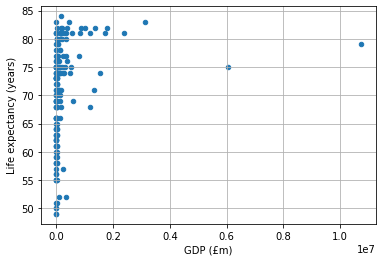

In [25]:
%matplotlib inline
gdpVsLifeAll.plot(x=GDP, y=LIFE, kind='scatter', grid=True)

This graph is not very useful. The GDP difference between the poorest and richest
countries is so vast that the whole chart is squashed to fit all GDP values on the x-axis. It
is best to use a **logarithmic scale** , where the axis values don’t increase by a constant
interval (10, 20, 30, for example), but by a multiplicative factor (10, 100, 1000, 10000,
etc.). The parameter **logx** has to be set to **True** to get a logarithmic scale on the x-axis.
Moreover, let’s make the chart a bit wider, by using the **figsize** parameter you saw last
week.

<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

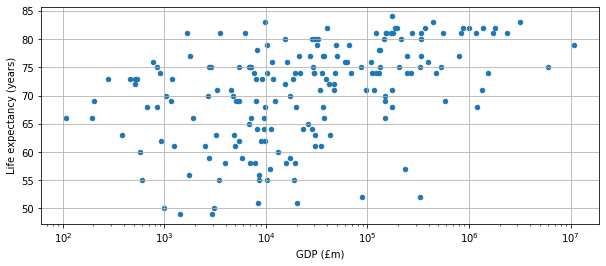

In [26]:
gdpVsLifeClean.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

The major tick marks in the x-axis go from 10^2 (that’s a one followed by two zeros, hence
100) to 10^8 (that’s a one followed by eight zeros, hence 100,000,000) million pounds, with
the minor ticks marking the numbers in between. For example, the eight minor ticks
between 10^2 and 10^3 represent the values 200 (2 × 10^2 ), 300 (3 × 10^2 ), and so on until
900 (9 × 10^2 ). As a further example, the country with the lowest life expectancy is on the
second minor tick to the right of 10^3 , which means its GDP is about 3 × 10^3 (three
thousand) million pounds.
Countries with a GDP around 10 thousand (10^4 ) millions of pounds have a wide range of
life expectancies, from under 50 to over 80, but the range tends to shrink both for poorer
and for richer countries. Countries with the lowest life expectancy are neither the poorest
nor the richest, but those with highest expectancy are among the richer countries.

### Tasks

- Swap the axes of the scatterplot, i.e. show the GDP in the y axis and the life expectancy in the x axis.
- Display a scatterplot of the GDP and the population.

I’ve written up my analysis of this week’s project in the notebook you can open this in your
downloaded files.
The structure is very simple: besides the introduction and the conclusions, there is one
section for each step of the analysis – downloading, cleaning, transforming, and merging
the data, then calculating and visualising the correlation.
Open the Project Notebook: Life expectancy
Extend project to answer different questions or create your own
project in the activity below.

## Activity
### Extend the project

Make a copy of the Project Notebook: GDP and Life expectancy and change it to answer one or
more of the following questions:
- To what extent do the ten countries with the highest GDP coincide with the ten
countries with the longest life expectancy?

- Which are the two countries in the right half of the plot (higher GDP) with life
expectancy below 60 years? 

- What factors could explain their lower life
expectancy compared to countries with similar GDP?
Hint: use the filtering techniques you learned in Week 2 to find the two countries.

- Redo the analysis using the countries’ GDP per capita (i.e. per inhabitant) instead
of their total GDP. If you’ve done the workbook task, you already have a
column with the population data.

Hint: write an expression involving the GDP and population columns, as you
learned in Calculating over columns in previous modules. Think about the units in which you
display GDP per capita.

- Redo the analysis using the indicator suggested at the end of the project
notebook.

**Create your own project**
Create a completely new project and choose another two of the
hundreds of World Bank indicators and see if there is any correlation between them. If
there is a choice of similar indicators, choose one that leads to meaningful
comparisons between countries.

Look at the results you obtained and take a few moments to assess how they differ
from mine.